In [52]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [53]:
airline_county_df = pd.read_csv('dataset/airline_county_gdf.csv')

In [54]:
import shapely.wkt

geometry = airline_county_df['geometry'].apply(shapely.wkt.loads)
airline_county_gdf = gpd.GeoDataFrame(airline_county_df, geometry=geometry)

In [55]:
airline_county_gdf

,YEAR,week,ORIGIN_AIRPORT_ID,COUNT_FLIGHTS,Description,IATA,AIRPORT,CITY,STATE,COUNTRY,...,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,2018,1,10140,362,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,1746,35,43,929113,0500000US35043,35043,Sandoval,6,9609139504,10854361
1,2018,1,10140,362,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,591,35,57,929112,0500000US35057,35057,Torrance,6,8664074710,2303485
2,2018,1,10140,362,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,971,35,61,933052,0500000US35061,35061,Valencia,6,2762826562,2787804
3,2018,1,10140,362,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,2289,35,1,1702363,0500000US35001,35001,Bernalillo,6,3007310205,16190430
4,2018,2,10140,269,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,1746,35,43,929113,0500000US35043,35043,Sandoval,6,9609139504,10854361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71903,2021,31,15624,274,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",VPS,Eglin Air Force Base,Valparaiso,FL,USA,...,1916,12,113,306914,0500000US12113,12113,Santa Rosa,6,2621316069,418753385
71904,2021,31,15624,274,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",VPS,Eglin Air Force Base,Valparaiso,FL,USA,...,52,12,91,306915,0500000US12091,12091,Okaloosa,6,2409367483,393201898
71905,2021,32,15624,265,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",VPS,Eglin Air Force Base,Valparaiso,FL,USA,...,574,12,131,295727,0500000US12131,12131,Walton,6,2687686788,522848570
71906,2021,32,15624,265,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",VPS,Eglin Air Force Base,Valparaiso,FL,USA,...,1916,12,113,306914,0500000US12113,12113,Santa Rosa,6,2621316069,418753385


In [56]:
airline_county_weekly_gdf = airline_county_gdf.groupby(['YEAR', 'week']).agg(
    {'COUNT_FLIGHTS' : 'sum'}
)
airline_county_weekly_gdf = airline_county_weekly_gdf.reset_index()

In [57]:
airline_county_weekly_gdf

,YEAR,week,COUNT_FLIGHTS
0,2018,1,437462
1,2018,2,369725
2,2018,3,373627
3,2018,4,373728
4,2018,5,369318
...,...,...,...
233,2022,27,411147
234,2022,28,421185
235,2022,29,420779
236,2022,30,420802


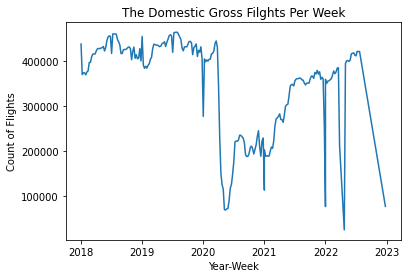

In [58]:
import matplotlib.pyplot as plt
# plt.plot(airline_county_weekly_gdf.index, airline_county_weekly_gdf['COUNT_FLIGHTS'], '-o')
plt.plot(airline_county_weekly_gdf['YEAR'] + (airline_county_weekly_gdf['week'] - 1) / 52, airline_county_weekly_gdf['COUNT_FLIGHTS'])
plt.xlabel('Year-Week')
plt.ylabel('Count of Flights')
plt.title('The Domestic Gross Filghts Per Week')
plt.show()

In [62]:
covid_airline_df = pd.read_csv('dataset/covid_airline.csv')
covid_airline_df

,YEAR,week,ORIGIN_AIRPORT_ID,COUNT_FLIGHTS,Description,IATA,AIRPORT,CITY,state,COUNTRY,...,fog,rain,snow,thunder,visibility,max_wind_speed,lat,lon,increasing_cases,geometry_y
0,2020,11,10140,318,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,0.0,0.0,0.0,0.0,NaN,NaN,35.688552,-106.866074,-264.0,POINT (-106.8660744344396 35.6885519350623)
1,2020,11,10140,318,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,0.0,3.0,0.0,1.0,9.900000,16.820000,35.051368,-106.670163,-1793.0,POINT (-106.6701630728667 35.05136808403244)
2,2020,12,10140,331,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,0.0,0.0,0.0,0.0,NaN,NaN,35.688552,-106.866074,5.0,POINT (-106.8660744344396 35.6885519350623)
3,2020,12,10140,331,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,0.0,3.0,0.0,0.0,9.957143,18.900000,35.051368,-106.670163,24.0,POINT (-106.6701630728667 35.05136808403244)
4,2020,13,10140,330,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,0.0,0.0,0.0,0.0,NaN,NaN,35.688552,-106.866074,11.0,POINT (-106.8660744344396 35.6885519350623)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,2020,11,13244,264,"Memphis, TN: Memphis International",MEM,Memphis International,Memphis,TN,USA,...,0.0,6.0,0.0,3.0,9.071429,17.442857,35.183994,-89.895553,1.0,POINT (-89.89555260928029 35.18399353427491)
7952,2020,12,13244,271,"Memphis, TN: Memphis International",MEM,Memphis International,Memphis,TN,USA,...,0.0,5.0,0.0,0.0,8.771429,13.785714,35.183994,-89.895553,64.0,POINT (-89.89555260928029 35.18399353427491)
7953,2020,13,13244,254,"Memphis, TN: Memphis International",MEM,Memphis International,Memphis,TN,USA,...,0.0,5.0,0.0,3.0,9.042857,14.885714,35.183994,-89.895553,296.0,POINT (-89.89555260928029 35.18399353427491)
7954,2020,12,15376,254,"Tucson, AZ: Tucson International",TUS,Tucson International,Tucson,AZ,USA,...,0.0,0.0,0.0,0.0,9.928571,14.557143,32.097430,-111.789906,14.0,POINT (-111.78990571870912 32.09742991489623)


In [64]:
geometry = covid_airline_df['geometry_x'].apply(shapely.wkt.loads)
covid_airline_gdf = gpd.GeoDataFrame(covid_airline_df, geometry=geometry)
covid_airline_gdf

,YEAR,week,ORIGIN_AIRPORT_ID,COUNT_FLIGHTS,Description,IATA,AIRPORT,CITY,state,COUNTRY,...,rain,snow,thunder,visibility,max_wind_speed,lat,lon,increasing_cases,geometry_y,geometry
0,2020,11,10140,318,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,0.0,0.0,0.0,NaN,NaN,35.688552,-106.866074,-264.0,POINT (-106.8660744344396 35.6885519350623),"POLYGON ((-106.32006 35.04022, -106.32145 35.0..."
1,2020,11,10140,318,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,3.0,0.0,1.0,9.900000,16.820000,35.051368,-106.670163,-1793.0,POINT (-106.6701630728667 35.05136808403244),"POLYGON ((-106.32006 35.04022, -106.32145 35.0..."
2,2020,12,10140,331,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,0.0,0.0,0.0,NaN,NaN,35.688552,-106.866074,5.0,POINT (-106.8660744344396 35.6885519350623),"POLYGON ((-106.32006 35.04022, -106.32145 35.0..."
3,2020,12,10140,331,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,3.0,0.0,0.0,9.957143,18.900000,35.051368,-106.670163,24.0,POINT (-106.6701630728667 35.05136808403244),"POLYGON ((-106.32006 35.04022, -106.32145 35.0..."
4,2020,13,10140,330,"Albuquerque, NM: Albuquerque International Sun...",ABQ,Albuquerque International,Albuquerque,NM,USA,...,0.0,0.0,0.0,NaN,NaN,35.688552,-106.866074,11.0,POINT (-106.8660744344396 35.6885519350623),"POLYGON ((-106.32006 35.04022, -106.32145 35.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,2020,11,13244,264,"Memphis, TN: Memphis International",MEM,Memphis International,Memphis,TN,USA,...,6.0,0.0,3.0,9.071429,17.442857,35.183994,-89.895553,1.0,POINT (-89.89555260928029 35.18399353427491),"POLYGON ((-89.68753 35.04242, -89.68892 35.014..."
7952,2020,12,13244,271,"Memphis, TN: Memphis International",MEM,Memphis International,Memphis,TN,USA,...,5.0,0.0,0.0,8.771429,13.785714,35.183994,-89.895553,64.0,POINT (-89.89555260928029 35.18399353427491),"POLYGON ((-89.68753 35.04242, -89.68892 35.014..."
7953,2020,13,13244,254,"Memphis, TN: Memphis International",MEM,Memphis International,Memphis,TN,USA,...,5.0,0.0,3.0,9.042857,14.885714,35.183994,-89.895553,296.0,POINT (-89.89555260928029 35.18399353427491),"POLYGON ((-89.68753 35.04242, -89.68892 35.014..."
7954,2020,12,15376,254,"Tucson, AZ: Tucson International",TUS,Tucson International,Tucson,AZ,USA,...,0.0,0.0,0.0,9.928571,14.557143,32.097430,-111.789906,14.0,POINT (-111.78990571870912 32.09742991489623),"POLYGON ((-110.65189 32.11608, -110.65329 32.0..."


In [74]:
all_grouped_case_airline = covid_airline_gdf.groupby(['YEAR', 'week']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'sum'}
)
all_grouped_case_airline = all_grouped_case_airline.reset_index()

In [69]:
from sklearn.linear_model import LinearRegression

# Define the X and y variables for the regression
X = all_grouped_case_airline['cases'].values.reshape(-1, 1)
y = all_grouped_case_airline['COUNT_FLIGHTS'].values

# Fit the linear regression model
reg = LinearRegression().fit(X, y)

# Print the coefficients
print("Coefficients:", reg.intercept_, reg.coef_)

Coefficients: 126066.771260757 [0.01163727]


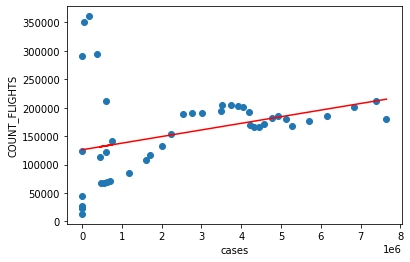

In [70]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('cases')
plt.ylabel('COUNT_FLIGHTS')
plt.show()

In [72]:
import statsmodels.api as sm

In [73]:
x = all_grouped_case_airline[['COUNT_FLIGHTS']]
y = all_grouped_case_airline['cases']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model = sm.OLS(y, x).fit()

# Get the p-values for each coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     5.594
Date:                Tue, 04 Apr 2023   Prob (F-statistic):             0.0225
Time:                        12:56:51   Log-Likelihood:                -736.24
No. Observations:                  46   AIC:                             1476.
Df Residuals:                      44   BIC:                             1480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.028e+06   7.16e+05      1.436

<ipython-input-121-56cdf0df24f6>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Blues")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


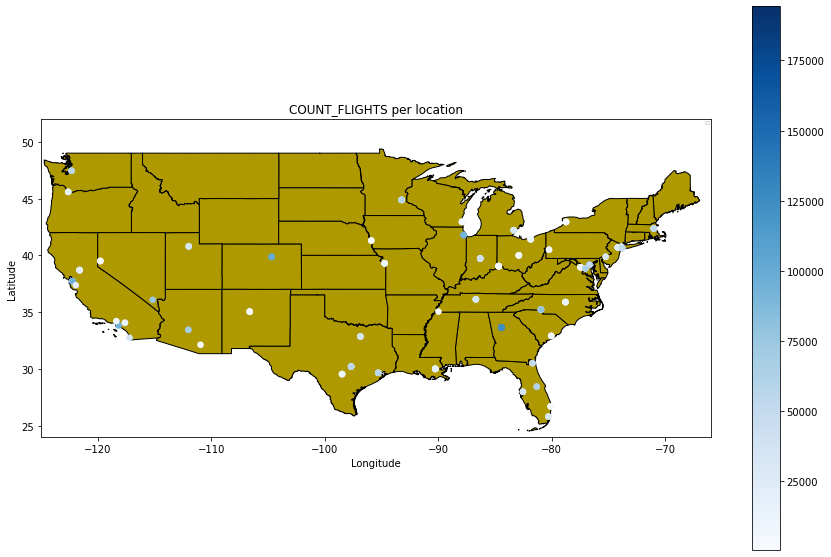

In [121]:
state_borders = gpd.read_file("./dataset/cb_2017_us_state_5m/cb_2017_us_state_5m.shp")

us_mainland = state_borders[state_borders["STUSPS"] != "AK"]
us_mainland = us_mainland.to_crs('epsg:4326')
fig, ax = plt.subplots(figsize=(15, 10))
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Blues")
county_grouped_case_airline = covid_airline_gdf.groupby(['Matching_County']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'sum',
     'geometry' : 'first'}
).reset_index()
county_grouped_case_airline = gpd.GeoDataFrame(county_grouped_case_airline, geometry='geometry')
county_grouped_case_airline.plot(column="COUNT_FLIGHTS", cmap=cmap, legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("COUNT_FLIGHTS per location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

<ipython-input-124-fc65666f21e4>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Reds")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


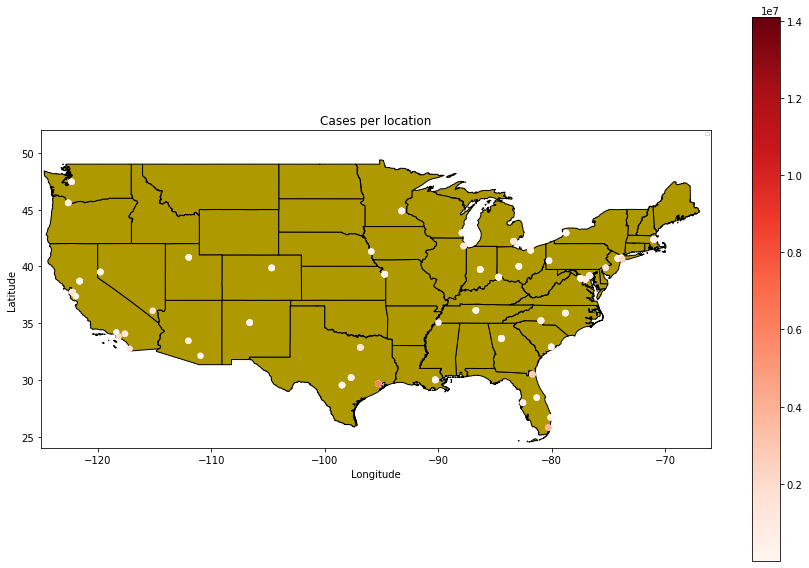

In [124]:
fig, ax = plt.subplots(figsize=(15, 10))
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Reds")
county_grouped_case_airline = covid_airline_gdf.groupby(['Matching_County']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'sum',
     'geometry' : 'first'}
).reset_index()
county_grouped_case_airline = gpd.GeoDataFrame(county_grouped_case_airline, geometry='geometry')
county_grouped_case_airline.plot(column="cases", cmap=cmap, legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("Cases per location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

In [ ]:
state_borders = gpd.read_file("./dataset/cb_2017_us_state_5m/cb_2017_us_state_5m.shp")
fig, ax = plt.subplots(figsize=(15, 10))
us_mainland = state_borders[state_borders["STUSPS"] != "AK"]
us_mainland = us_mainland.to_crs('epsg:4326')
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Blues")
covid_airline_gdf.plot(column="COUNT_FLIGHTS", cmap=cmap, legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("COUNT_FLIGHTS per location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

In [85]:
state_borders

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131174431216,4592944701,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1478588231566,277723861311,"MULTIPOLYGON (((-150.24210 61.13783, -150.2287..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198661567,1027245114,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268425964573,1178495763,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,12,00294478,0400000US12,12,FL,Florida,00,138911437206,31398800291,"MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ..."
5,13,01705317,0400000US13,13,GA,Georgia,00,149177524294,4733385577,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."
6,18,00448508,0400000US18,18,IN,Indiana,00,92787765193,1539541677,"POLYGON ((-88.09566 37.90581, -88.08624 37.905..."
7,20,00481813,0400000US20,20,KS,Kansas,00,211753159949,1346325556,"POLYGON ((-102.05174 40.00308, -101.91670 40.0..."
8,23,01779787,0400000US23,23,ME,Maine,00,79885808421,11748168571,"MULTIPOLYGON (((-68.37659 44.11376, -68.37538 ..."
9,25,00606926,0400000US25,25,MA,Massachusetts,00,20204287539,7130763257,"MULTIPOLYGON (((-70.27553 41.31046, -70.26063 ..."
